In [31]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np
from keras.regularizers import l1, l2
from sklearn.metrics import confusion_matrix
import seaborn as sns

Load the MNIST dataset

In [15]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [9 8 1 4 8 6 2 5 9 4]


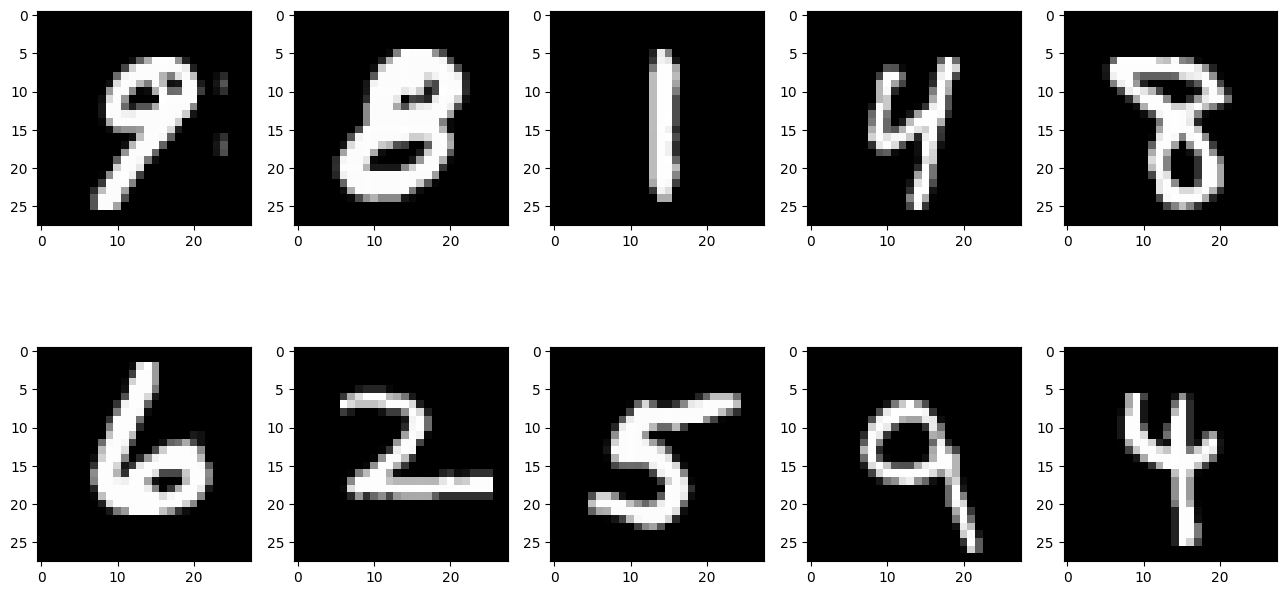

In [16]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [17]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [28]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.0001)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.0001)))
model.add(Dense(10, activation='softmax', kernel_regularizer=l2(0.0001)))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                50240     
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


Train the model

In [30]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4377 - accuracy: 0.9154
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2713 - accuracy: 0.9572
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2364 - accuracy: 0.9652
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2172 - accuracy: 0.9704
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2061 - accuracy: 0.9727
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1999 - accuracy: 0.9740
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1899 - accuracy: 0.9765
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1879 - accuracy: 0.9761
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1812 - accuracy: 0.9786
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.176

Plot the loss and accuracy graphs

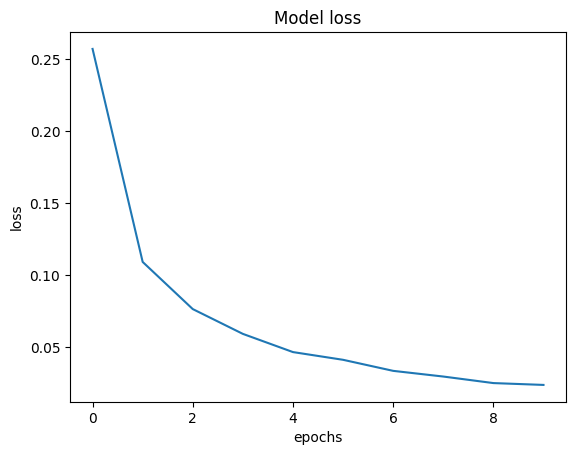

In [21]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

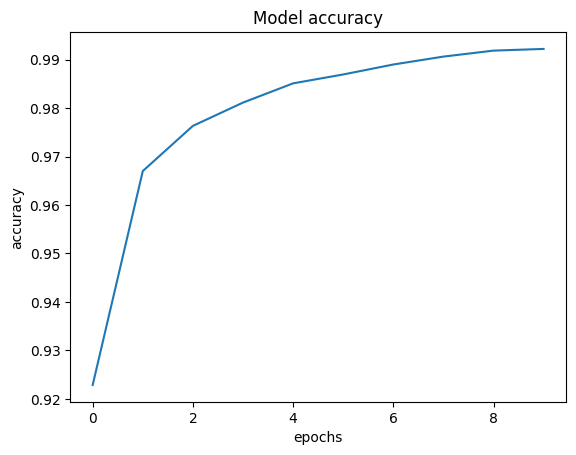

In [22]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [23]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0926 - accuracy: 0.9770
Loss of the Test dataset is: 0.09258154034614563
Accuracy of the test dataset is: 0.9769999980926514


Save the model weights

In [24]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

In [33]:
# Make Predictions
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

# True labels (ground truth) for the test data
true_labels = np.argmax(new_test_target, axis=1)
# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

313/313 [==============================] - 1s 3ms/step


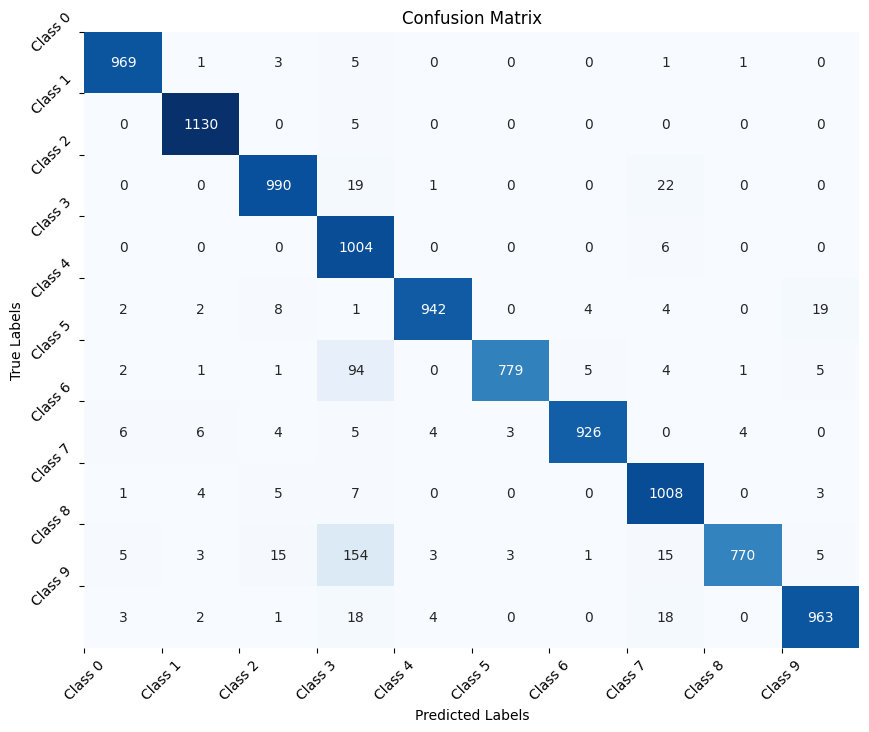

In [37]:
# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
class_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7", "Class 8", "Class 9"]
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.xticks(np.arange(10), labels=class_names, rotation=45)
plt.yticks(np.arange(10), labels=class_names, rotation=45)
plt.show()